In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 733.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 72.4 MB/s eta 0:00:00
   ━━━━━

In [1]:
import pycaret
print(pycaret.__version__)

3.3.2


In [2]:
import numpy as np

from pycaret.classification import (
    setup,
    compare_models,
    create_model,
    tune_model,
    plot_model,
    evaluate_model,
    predict_model,
    finalize_model,
    save_model,
    load_model
)
from pycaret.datasets import get_data

# PyCaret para Classificação

Neste exercício, você vai escolher outra base de dados do Pycaret para repetir a pipeline de treinamento realizada em aula.

## Base de dados

Recupere todas as bases de dados disponibilizadas pelo Pycaret.

In [3]:
all_bases = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


Desta vez, vamos utilizar o dataset `questions`, que é um dataset de classificação com mais de duas classes.

Recupere este dataset.

In [4]:
dataset = get_data('questions')

,CAT_1_Freq,CAT_2_Freq,CAT_3_Freq,Next_Question
0,0.483696,0.391304,0.125000,1
1,0.316583,0.286432,0.396985,2
2,0.267176,0.534351,0.198473,1
3,0.521739,0.417391,0.060870,1
4,0.476923,0.446154,0.076923,1


Não existe documentação sobre este dataset, mas podemos inferir pelas colunas que, dada a frequência das categorias 1, 2 e 3, se busca inferir a caegoria da próxima pergunta (`Next_Question`).

Verifique quantas instâncias e quantos atributos este dataset possui.

In [5]:
dataset.shape

(499, 4)

Verifique as categorias (coluna `Next_Question`) e sua respectiva contagem.

In [6]:
np.unique(dataset['Next_Question'], return_counts=True)

(array([1, 2, 3]), array([327, 122,  50]))

Gere uma base de treinamento correspondente a 90% dos dados totais.

In [7]:
base_train = dataset.sample(frac=0.9, random_state=1)
base_train.shape

(449, 4)

Gere a base de testes, correspondente aos dados totais que não estão presentes na base de treinamento.

In [8]:
base_test = dataset.drop(base_train.index)
base_test.shape

(50, 4)

## Configuração do ambiente PyCaret

Gere um experimento, utilizando a base de treinamento.

In [9]:
experiment = setup(data=base_train, target='Next_Question', session_id=1)

,Description,Value
0,Session id,1
1,Target,Next_Question
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(449, 4)"
5,Transformed data shape,"(449, 4)"
6,Transformed train set shape,"(314, 4)"
7,Transformed test set shape,"(135, 4)"
8,Numeric features,3
9,Preprocess,True


## Treinamento de vários modelos com validação cruzada

Execute uma comparação de modelos, organizando os resultandos pela coluna `Accuracy`. Solicite 10 folds.

In [10]:
models = compare_models(sort='Accuracy', fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.6875,0.0000,0.6875,0.5969,0.6083,0.1878,0.2410,0.0280
lr,Logistic Regression,0.6844,0.0000,0.6844,0.5927,0.6026,0.1736,0.2308,0.8030
lda,Linear Discriminant Analysis,0.6814,0.0000,0.6814,0.5850,0.6137,0.2024,0.2389,0.0490
nb,Naive Bayes,0.6750,0.7096,0.6750,0.5885,0.6253,0.2384,0.2475,0.0290
svm,SVM - Linear Kernel,0.6565,0.0000,0.6565,0.5523,0.5724,0.1269,0.1545,0.0360
dummy,Dummy Classifier,0.6560,0.5000,0.6560,0.4305,0.5199,0.0000,0.0000,0.0260
knn,K Neighbors Classifier,0.6270,0.6256,0.6270,0.5372,0.5687,0.0900,0.1045,0.0970
gbc,Gradient Boosting Classifier,0.6237,0.0000,0.6237,0.5659,0.5834,0.1373,0.1484,0.4380
lightgbm,Light Gradient Boosting Machine,0.6175,0.6171,0.6175,0.5734,0.5906,0.1579,0.1616,0.1610
rf,Random Forest Classifier,0.6173,0.6452,0.6173,0.5721,0.5861,0.1478,0.1567,0.2060


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Tuning dos modelos

Pelos resultados observados, você pode ver que alguns modelos com maior acurácia têm métrica AUC igual a 0. Então, crie um modelo do tipo Naive Bayes, já que é o primeiro modelo na lista com métrica AUC alta.

In [11]:
naive_bayes = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7188,0.6694,0.7188,0.6571,0.6856,0.4025,0.4095
1,0.7812,0.8454,0.7812,0.7031,0.7396,0.5088,0.5242
2,0.6250,0.7031,0.6250,0.5375,0.5691,0.0791,0.0889
3,0.6250,0.6320,0.6250,0.5580,0.5891,0.1967,0.2030
4,0.5806,0.6689,0.5806,0.4516,0.5081,-0.1011,-0.1171
5,0.7742,0.8028,0.7742,0.6935,0.7312,0.4681,0.4848
6,0.6774,0.7824,0.6774,0.6059,0.6392,0.2906,0.2997
7,0.8065,0.7610,0.8065,0.7312,0.7578,0.5496,0.5933
8,0.5806,0.6454,0.5806,0.4734,0.5166,-0.0050,-0.0056


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Exiba os parâmetros deste modelo.

In [12]:
print(naive_bayes)

GaussianNB(priors=None, var_smoothing=1e-09)


Execute o tuning do modelo.

In [13]:
naive_bayes_tuning = tune_model(naive_bayes)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7188,0.6694,0.7188,0.6571,0.6856,0.4025,0.4095
1,0.7812,0.8454,0.7812,0.7031,0.7396,0.5088,0.5242
2,0.6250,0.7031,0.6250,0.5375,0.5691,0.0791,0.0889
3,0.6250,0.6320,0.6250,0.5580,0.5891,0.1967,0.2030
4,0.5806,0.6689,0.5806,0.4516,0.5081,-0.1011,-0.1171
5,0.7742,0.8028,0.7742,0.6935,0.7312,0.4681,0.4848
6,0.6774,0.7824,0.6774,0.6059,0.6392,0.2906,0.2997
7,0.8065,0.7610,0.8065,0.7312,0.7578,0.5496,0.5933
8,0.5806,0.6454,0.5806,0.4734,0.5166,-0.0050,-0.0056


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Exiba os parâmetros do modelo ajustado.

In [14]:
print(naive_bayes_tuning)

GaussianNB(priors=None, var_smoothing=1e-09)


Agora crie um modelo do tipo Light Gradient Boosting Machine.

In [15]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5938,0.6171,0.5938,0.5710,0.5821,0.1545,0.1549
1,0.6875,0.7520,0.6875,0.6267,0.6542,0.3059,0.3130
2,0.6562,0.6511,0.6562,0.6194,0.6280,0.2230,0.2325
3,0.6250,0.6138,0.6250,0.6003,0.6048,0.1830,0.1871
4,0.6774,0.6257,0.6774,0.6290,0.6475,0.2619,0.2697
5,0.6452,0.5895,0.6452,0.5630,0.5996,0.1345,0.1424
6,0.6129,0.5569,0.6129,0.5798,0.5948,0.1895,0.1913
7,0.6452,0.6464,0.6452,0.5963,0.6178,0.2285,0.2339
8,0.5161,0.5665,0.5161,0.4966,0.5038,-0.0022,-0.0022


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Exiba os parâmetros do modelo.

In [16]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


Faça o tuning do modelo, investindo o número de estimadores (`n_estimators`) no intervalo 50 a 100, com passos de 10.

In [17]:
lightgbm_tuning = tune_model(lightgbm, custom_grid = {'n_neighbors' : np.arange(50, 101, 10)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5938,0.6171,0.5938,0.5710,0.5821,0.1545,0.1549
1,0.6875,0.7520,0.6875,0.6267,0.6542,0.3059,0.3130
2,0.6562,0.6511,0.6562,0.6194,0.6280,0.2230,0.2325
3,0.6250,0.6138,0.6250,0.6003,0.6048,0.1830,0.1871
4,0.6774,0.6257,0.6774,0.6290,0.6475,0.2619,0.2697
5,0.6452,0.5895,0.6452,0.5630,0.5996,0.1345,0.1424
6,0.6129,0.5569,0.6129,0.5798,0.5948,0.1895,0.1913
7,0.6452,0.6464,0.6452,0.5963,0.6178,0.2285,0.2339
8,0.5161,0.5665,0.5161,0.4966,0.5038,-0.0022,-0.0022


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 6 candidates, totalling 60 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Exiba os parâmetros do modelo ajustado.

In [18]:
print(lightgbm_tuning)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


## Gráficos

Exiba um gráfico da matriz de confusão do modelo Naive Bayes ajustado por tuning de parâmetros.

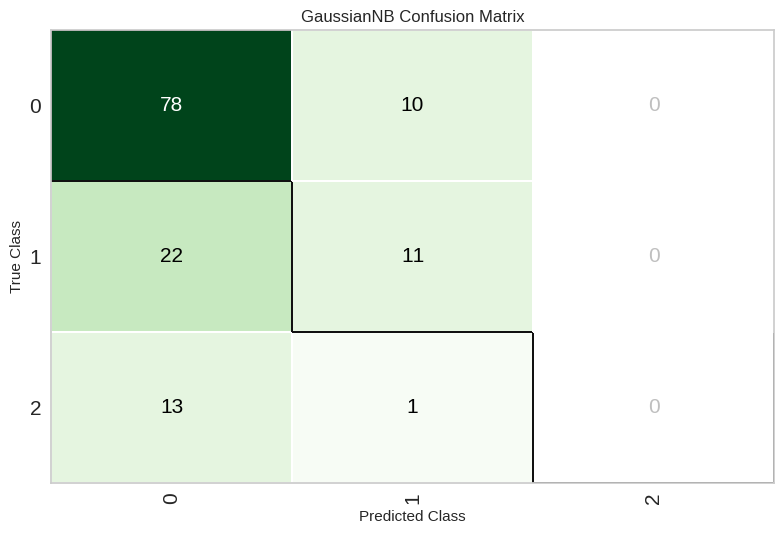

In [19]:
plot_model(naive_bayes_tuning, plot='confusion_matrix')

Agora exiba um gráfico do reporte por classe.

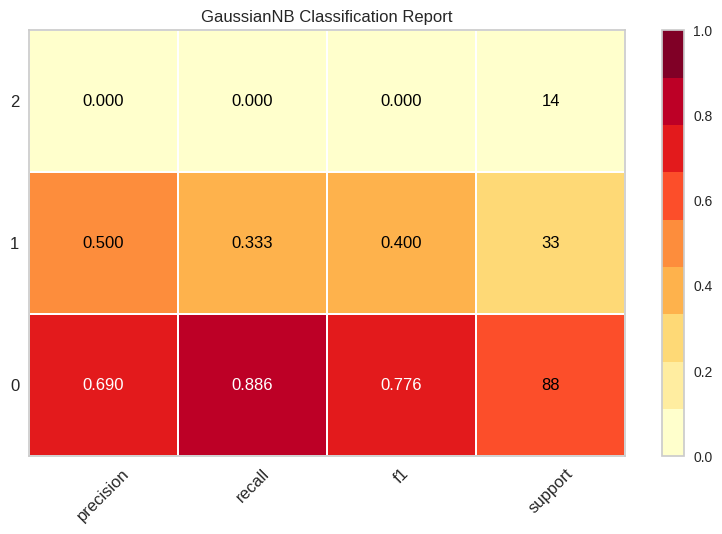

In [20]:
plot_model(naive_bayes_tuning, plot='class_report')

Exiba um gráfico do tipo fronteira (boundary).

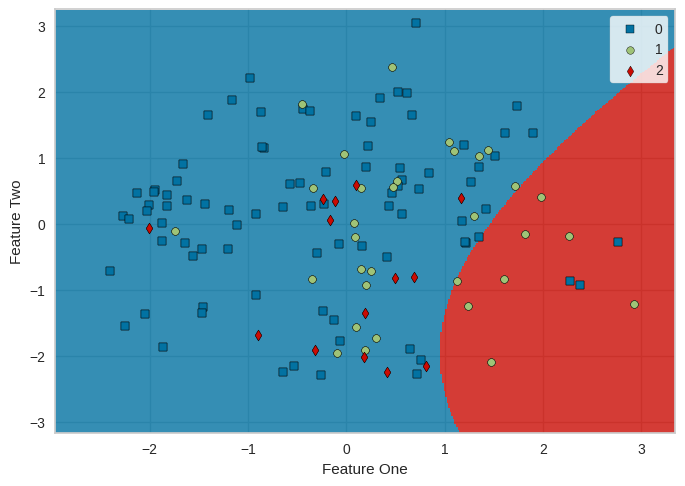

In [21]:
plot_model(naive_bayes_tuning, plot='boundary')

Exiba um gráfico com os erros do algoritmo.

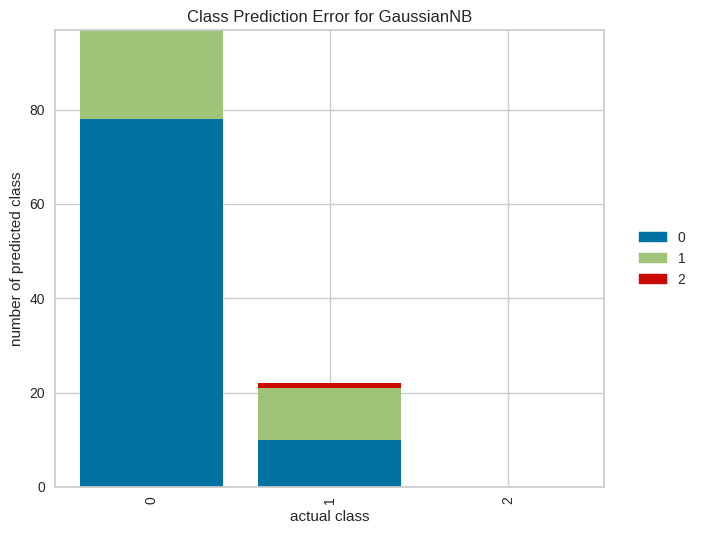

In [22]:
plot_model(naive_bayes_tuning, plot='error')

Exiba a avaliação do modelo.

In [23]:
evaluate_model(naive_bayes_tuning)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Previsões com o modelo

Execute as previsões do modelo.

In [24]:
predict_model(naive_bayes_tuning);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6593,0,0.6593,0.5722,0.6037,0.1780,0.1989


Crie uma versão final do modelo ajustado por tuning de hiperparâmetros.

In [25]:
naive_bayes_final = finalize_model(naive_bayes_tuning)
print(naive_bayes_final)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['CAT_1_Freq', 'CAT_2_Freq',
                                             'CAT_3_Freq'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 Transfor

Salve este modelo.

In [26]:
save_model(naive_bayes_final, 'naive_bayes')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CAT_1_Freq', 'CAT_2_Freq',
                                              'CAT_3_Freq'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
          

Recarregue o modelo salvo.

In [27]:
naive_bayes_loaded = load_model('/content/naive_bayes')

Transformation Pipeline and Model Successfully Loaded


Faça previsões com o modelo recarregado na base de testes.

In [28]:
prevision = predict_model(naive_bayes_loaded, data=base_test)
prevision

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6600,0,0.6600,0.5829,0.6177,0.2137,0.2238


,CAT_1_Freq,CAT_2_Freq,CAT_3_Freq,Next_Question,prediction_label,prediction_score
1,0.316583,0.286432,0.396985,2,1,0.5291
7,0.007519,0.353383,0.639098,2,2,0.4579
22,0.460396,0.277228,0.262376,1,1,0.7686
37,0.213483,0.230337,0.556180,2,2,0.4954
50,0.149171,0.303867,0.546961,1,2,0.4009
68,0.113772,0.311377,0.574850,3,2,0.4184
71,0.317829,0.360465,0.321705,3,1,0.6658
72,0.050000,0.490000,0.460000,3,1,0.5027
86,0.323944,0.640845,0.035211,1,1,0.9716
115,0.412500,0.137500,0.450000,2,2,0.4778
